In [2]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
#data import
game_data = pd.read_csv('data/games.csv')

In [4]:
print("Data type : ", type(game_data))
print("Data dims : ", game_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70210, 39)


In [5]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70210 entries, 0 to 70209
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       70210 non-null  int64  
 1   Name                        70209 non-null  object 
 2   Release date                70210 non-null  object 
 3   Estimated owners            70210 non-null  object 
 4   Peak CCU                    70210 non-null  int64  
 5   Required age                70210 non-null  int64  
 6   Price                       70210 non-null  float64
 7   DLC count                   70210 non-null  int64  
 8   About the game              67909 non-null  object 
 9   Supported languages         70210 non-null  object 
 10  Full audio languages        70210 non-null  object 
 11  Reviews                     9121 non-null   object 
 12  Header image                70210 non-null  object 
 13  Website                     346

In [6]:
#remove columns
print(game_data.columns.tolist())

['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']


### unnecessary columns (not relevant to data analysis)
| URLS/contact info | images/videos | irrelevant/unsuable data |
|---|---|---|
| website | screenshots | user score (mostly nan) |
| support url | movies | score rank (mostly null) |
|  support email | header image | achievement count |
|  metacritic url |   |   |


In [7]:
removed_columns = ["Header image", "Website", "Support url", "Support email", "Metacritic url", "User score", "Score rank", "Achievements", "Screenshots", "Movies"]
cleaned_game_data = game_data.drop(columns=removed_columns)
cleaned_game_data.to_csv("test.csv", sep=',', encoding='utf-8')
cleaned_game_data.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [9]:
test = cleaned_game_data.loc[cleaned_game_data['Genres'].str.contains(r"utilities", case=False, na=False)]

test2 = cleaned_game_data.loc[~cleaned_game_data['Genres'].str.contains(r"utilities", case=False, na=False)]

test2 = test2.loc[~test2['Tags'].str.contains(r"utilities", case=False, na=False)]

test2.to_csv("test1.csv", sep=',', encoding='utf-8')
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69358 entries, 0 to 70209
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       69358 non-null  int64  
 1   Name                        69357 non-null  object 
 2   Release date                69358 non-null  object 
 3   Estimated owners            69358 non-null  object 
 4   Peak CCU                    69358 non-null  int64  
 5   Required age                69358 non-null  int64  
 6   Price                       69358 non-null  float64
 7   DLC count                   69358 non-null  int64  
 8   About the game              67058 non-null  object 
 9   Supported languages         69358 non-null  object 
 10  Full audio languages        69358 non-null  object 
 11  Reviews                     9043 non-null   object 
 12  Windows                     69358 non-null  bool   
 13  Mac                         693

In [11]:
test3 = test2.dropna(subset=["Categories", "Genres", "Tags"], how='all')
test3.to_csv("test2.csv", sep=',', encoding='utf-8')
test3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67138 entries, 0 to 70209
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       67138 non-null  int64  
 1   Name                        67138 non-null  object 
 2   Release date                67138 non-null  object 
 3   Estimated owners            67138 non-null  object 
 4   Peak CCU                    67138 non-null  int64  
 5   Required age                67138 non-null  int64  
 6   Price                       67138 non-null  float64
 7   DLC count                   67138 non-null  int64  
 8   About the game              67051 non-null  object 
 9   Supported languages         67138 non-null  object 
 10  Full audio languages        67138 non-null  object 
 11  Reviews                     9043 non-null   object 
 12  Windows                     67138 non-null  bool   
 13  Mac                         671

Positive: number of positive reviews
Negative: number of negative reviews

In [22]:
posRate = pd.DataFrame(test2['Positive']) 
negRate = pd.DataFrame(test2['Negative']) 
price = pd.DataFrame(test2['Price']) 
rate_price = pd.DataFrame(test2[["Positive", "Negative", "Price"]])

In [23]:
rate_price.describe().round(2)

,Positive,Negative,Price
count,69358.00,69358.00,69358.00
mean,1141.05,187.32,7.17
std,26895.01,5058.53,10.85
min,0.00,0.00,0.00
25%,1.00,0.00,0.99
50%,10.00,3.00,4.99
75%,61.00,19.00,9.99
max,5764420.00,895978.00,999.00


<AxesSubplot:>

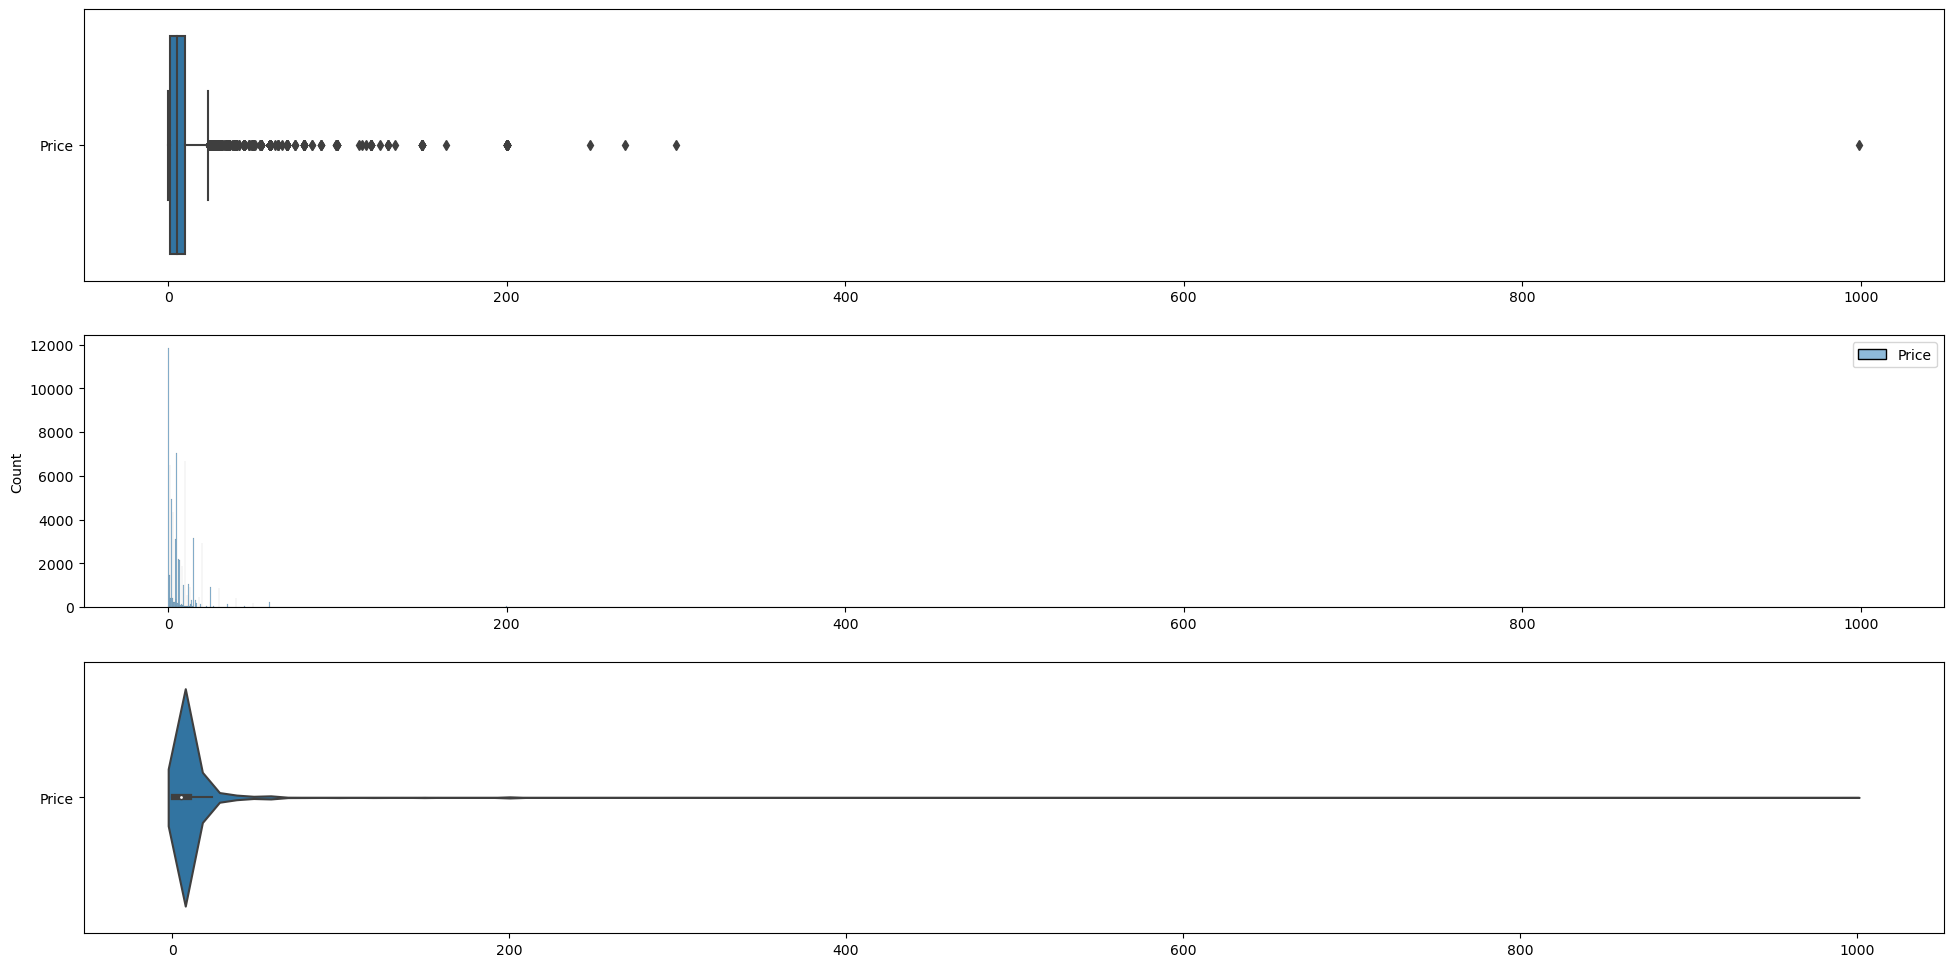

In [24]:
f, axes = plt.subplots(3, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = price, orient = "h", ax = axes[0])
sb.histplot(data = price, ax = axes[1])
sb.violinplot(data = price, orient = "h", ax = axes[2])

<AxesSubplot:>

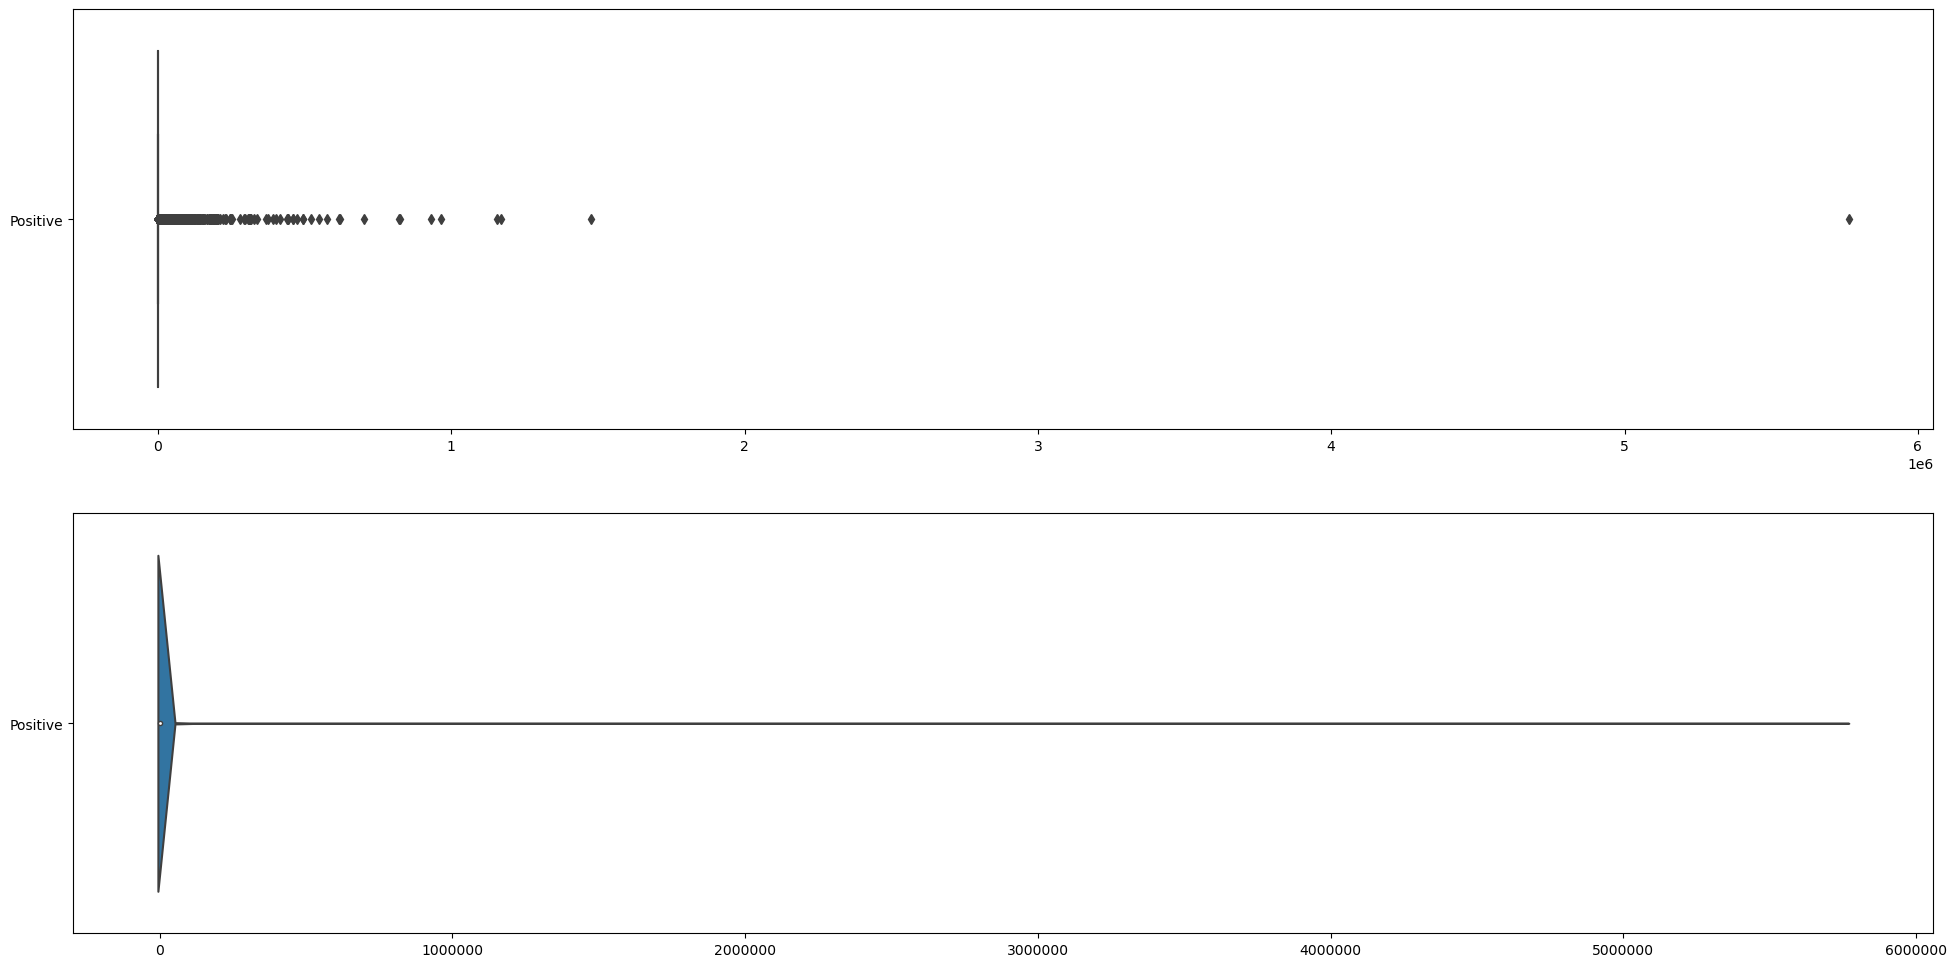

In [25]:
f, axes = plt.subplots(2, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = posRate, orient = "h", ax = axes[0])
# sb.histplot(data = posRate, ax = axes[1])
sb.violinplot(data = posRate, orient = "h", ax = axes[1])

<AxesSubplot:>

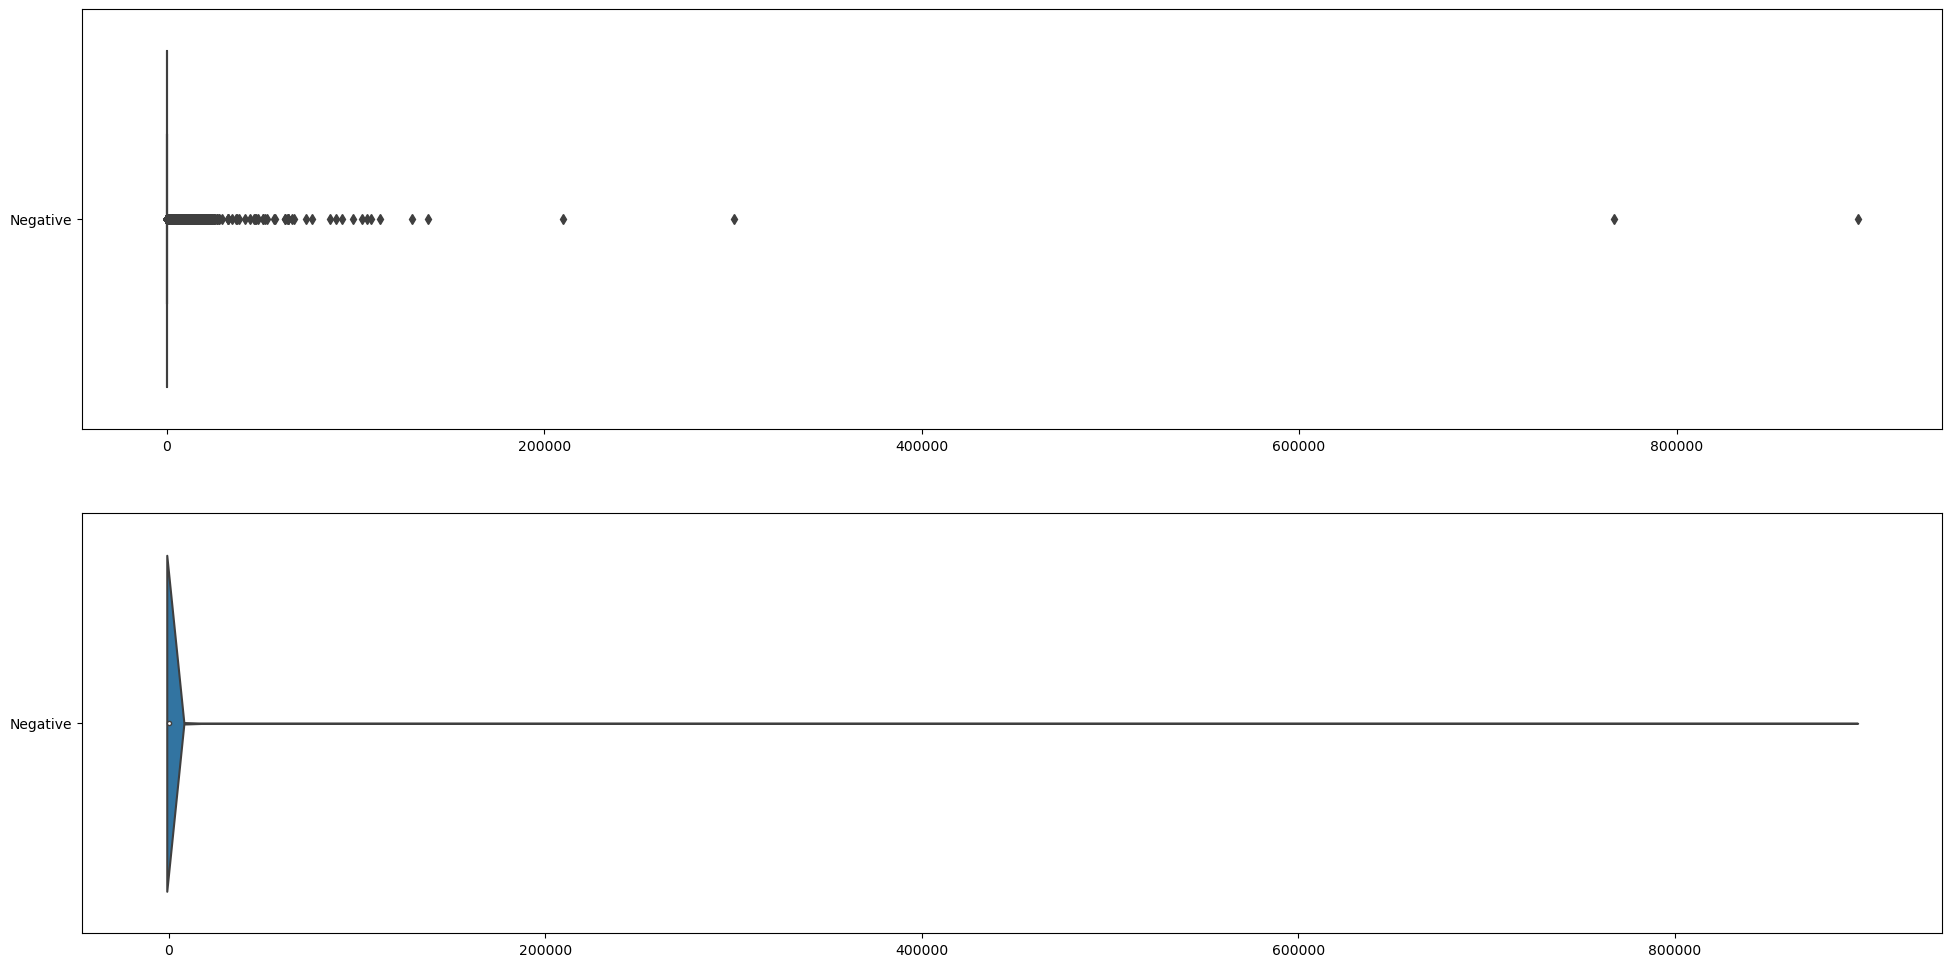

In [26]:
f, axes = plt.subplots(2, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = negRate, orient = "h", ax = axes[0])
# sb.histplot(data = negRate, ax = axes[1])
sb.violinplot(data = negRate, orient = "h", ax = axes[1])

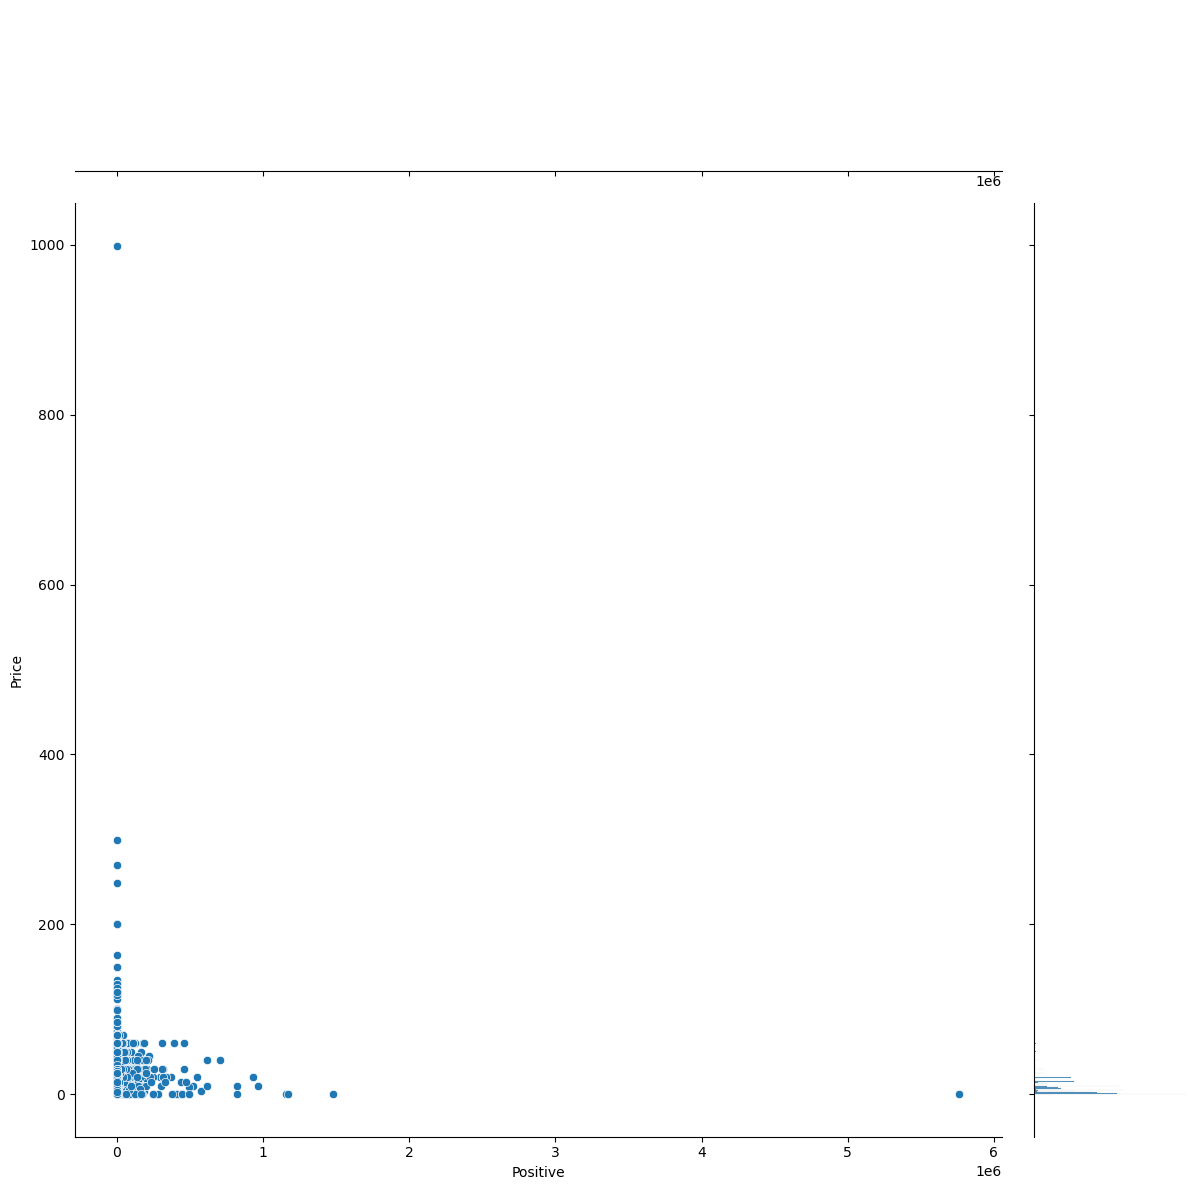

In [27]:
pos_price = pd.concat([posRate, price], axis = 1).reindex(posRate.index)
sb.jointplot(data = pos_price, x = "Positive", y = "Price", height = 12)

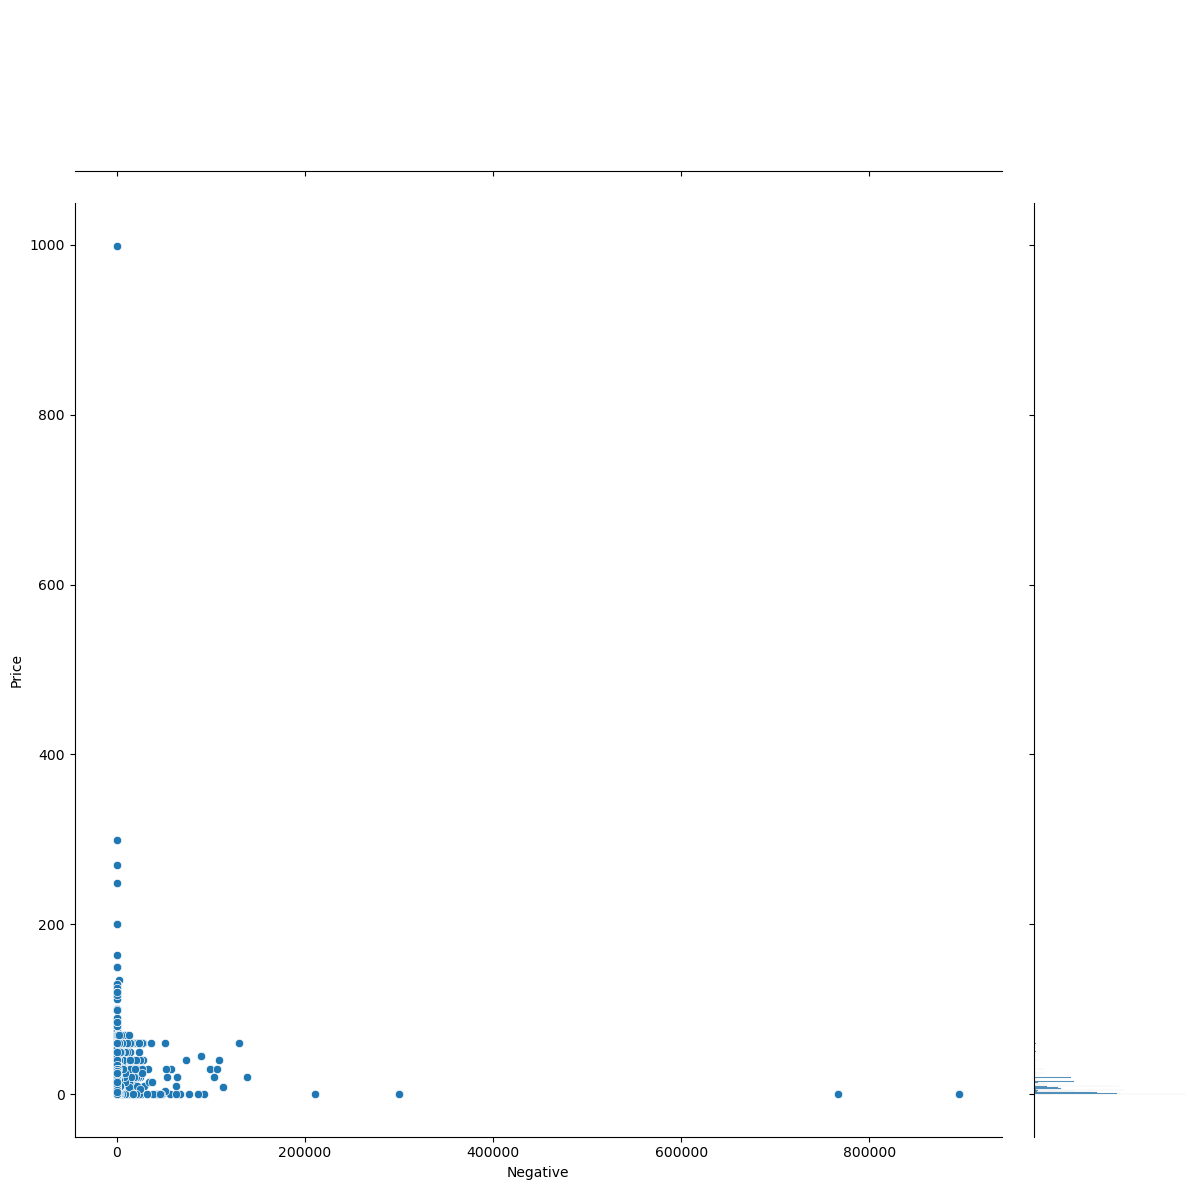

In [29]:
neg_price = pd.concat([negRate, price], axis = 1).reindex(negRate.index)
sb.jointplot(data = neg_price, x = "Negative", y = "Price", height = 12)

In [28]:
print(rate_price.corr())

          Positive  Negative     Price
Positive  1.000000  0.786179  0.036194
Negative  0.786179  1.000000  0.029345
Price     0.036194  0.029345  1.000000
